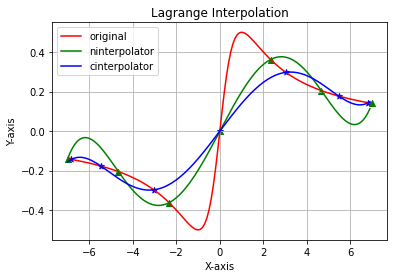

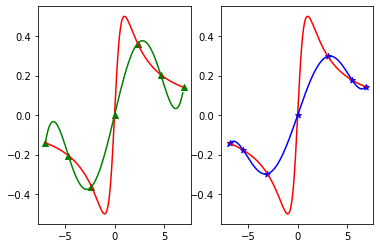

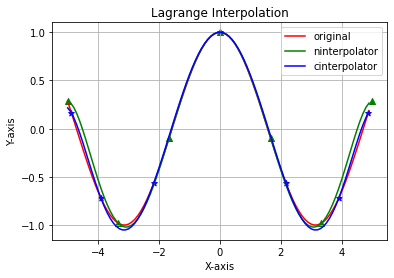

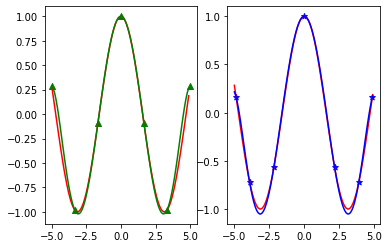

In [ ]:
'''Lagrange interpolation from scratch'''

import numpy as np
import matplotlib.pyplot as plt
from math import *
#defining the interpolating polynomial
def Lagrangepoly(x,l,u):
  r=len(l)
  y=0
  for i in range(r):
    z=u[i]
    for j in l:
      if j!=l[i]:
        z=z*(x-j)/(l[i]-j)
    y=y+z
  return y
#Lagrangepoly(3,[0,1,2],[0,1,4])

def Lagrangeinterpol(f,n,a,b):
  #defining the equally spaced nodes
  nlist=[a+(b-a)*j/n for j in range(0,n+1)]
  #defining chebychev nodes
  clist=[(1/2)*((b-a)*(np.cos(((2*j+1)*(np.pi))/(2*(n+1))))+a+b) for j in range(0,n+1)]
  #defining the interpolator for equally spaced nodes
  def ninterpolator(x):
    u=list(map(f,nlist))
    return Lagrangepoly(x,nlist,u)
  #defining interpolator for chebychev nodes
  def cinterpolator(x):
    u=list(map(f,clist))
    return Lagrangepoly(x,clist,u)

#Plotting the graph of f vs interpolators
  X=np.arange(a,b,0.1) #X-axis with the given range
  y=f(X) #given function
  #interpolators
  z=ninterpolator(X)
  w=cinterpolator(X)
  #running the plot function for the given function and interpolators
  plt.plot(X,y,color='r',label='original')
  plt.plot(X,z,color='g',label='ninterpolator')
  plt.plot(X,w,color='b',label='cinterpolator')
  #Superimposing the scatter plot of the x and y values of points where the function agrees with the interpolator
  Q=nlist
  P=clist
  R=list(map(f,clist))
  S=list(map(f,nlist))
  plt.scatter(P,R,color='b',marker='*')
  plt.scatter(Q,S,color='g',marker='^')
  #labelling
  plt.xlabel("X-axis")
  plt.ylabel("Y-axis")
  plt.title("Lagrange Interpolation")
  plt.legend()
  plt.grid()
  plt.show()

  #plt.subplot(1,2)
  ax1=plt.subplot(1,2,1)
  ax2=plt.subplot(1,2,2)
  ax1.plot(X,y,color='r',label='original')
  ax1.plot(X,z,color='g',label='ninterpolator')
  ax1.scatter(Q,S,color='g',marker='^')
  ax2.plot(X,y,color='r',label='original')
  ax2.plot(X,w,color='b',label='cinterpolator')
  ax2.scatter(P,R,color='b',marker='*')
  plt.show()


#test functions
def f1(x):           #Runge's bad counterexample
  y=x/(1+x**2)
  return y
def f2(x):
  y=np.cos(x)
  return y

Lagrangeinterpol(f1,6,-7,7)
Lagrangeinterpol(f2,6,-5,5)

In [ ]:
'''Newton Interpolation from Scratch'''

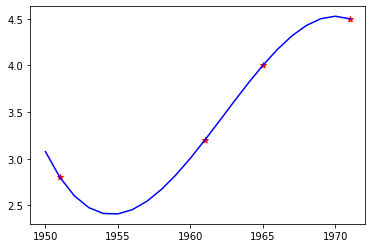

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# the product term
def w(k,u,x):
  return np.prod([(x-j) for j in u[0:k]])
#the difference table
def differencetable(u,v):
  u=np.array(u)
  n=len(u)
  a=np.zeros([n,n])
  a[:,0]=v
  for j in range(1,n):
    #a[:n-j,j] = (a[1:n-j+1,j-1] - a[:n-j,j-1]) / (u[j:n]-u[0:n-j])
    #success.numpy does term by term calculations if u can match the size of arrays
    for i in range(0,n-j):
      a[i][j]=(a[i+1][j-1]-a[i][j-1])/(u[i+j]-u[i])
  return a
#checking the correctness of diff table code
#print(differencetable([0,1,2,3,4],[0,1,8,27,64]))
#check success

#defining the interpolating polynomial
def NewtonInterpolator(u,v,x):
  a=differencetable(u,v)
  #print(type(a))
  #print(a.shape)
  p=0
  for j in range(0,len(u)):
    p=p+w(j,u,x)*a[0,j]
  return p
#Checking the correctness of interpolator function
#print(NewtonInterpolator([1951,1961,1971],[2.8,3.2,4.5],1966))
#check success

#Plotting an example
u=[1951,1961,1965,1971]
v=[2.8,3.2,4,4.5]
x=np.arange(1950,1972,1)
y=[NewtonInterpolator(u,v,z) for z in x]
plt.plot(x,y,color='b')
plt.scatter(u,v,color='r',marker='*')
plt.show()

#Broadcasting,speed difference







In [ ]:
'''mid-point,trapezoidal and cavalieri-simpson formula'''

import scipy.integrate as integrate
import numpy as np
#Integral mid-point formula
def midptintegral(f,a,b,m):
  h=(b-a)/m
  x=[a+((2*k+1)*h)/2 for k in range(0,m)]
  i=0
  for j in x:
    i=i+h*f(j)
  return i
#checking correctness
print(midptintegral(lambda x:x**3,0,1,20))
print(integrate.quad(lambda x:x**3,0,1))
#success

#Trapezoidal rule
def trapintegral(f,a,b,m):
  h=(b-a)/m
  x=np.array([f(a+k*h) for k in range(0,m+1)])
  y=[1/2]+[1 for i in range(1,m)]+[1/2]
  y=np.array(y)
  z=h*x*y #trying to use broadcasting
  return np.sum(z)
#checking correctness
print(trapintegral(np.sin,0,1,100))
print(integrate.quad(np.sin,0,1))
#success

#Cavalieri-Simpson Formula
def simpsonc(f,a,b,m):
  h=(b-a)/m
  x=np.array([f(a+k*(h/2)) for k in range(0,2*m+1)])
  y=[1/6]+[0 for i in range(1,2*m)]+[1/6]
  for i in range(1,2*m):
    if i%2==0:
      y[i]=2/6
    else:
      y[i]=4/6
  y=np.array(y)
  z=h*x*y
  return np.sum(z)
#checking correctness
print(simpsonc(np.tanh,0,1,10))
print(integrate.quad(np.tanh,0,1))
#success




0.24968750000000006
(0.25, 2.7755575615628914e-15)
0.4596938633113579
(0.45969769413186023, 5.103669643922839e-15)
0.43378092173527616
(0.4337808304830271, 4.815934656432787e-15)
